In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
customers = pd.read_excel('Customers.xls')
products = pd.read_excel('Products.xls')
customers.loc[customers.duplicated(subset='CUSTOMER_KEY', keep='last')]

,CUSTOMER_KEY,CLIENT_DATE,AGE,REGION,NUM_OF_CONTACT,NUM_OF_TXN,EmailPermission,MailPermission
52,1053,2001-07-30,27,Ontario,16,16,N,N
74,1075,1999-08-16,29,Ontario,124,47,Y,Y
145,1146,2001-04-26,29,Ontario,254,20,Y,N


In [259]:
customers.loc[customers.duplicated(subset='CUSTOMER_KEY', keep='last')]
customers = customers.drop_duplicates(subset='CUSTOMER_KEY', keep='last')
txt = customers.NUM_OF_TXN.replace(".", "0" )
customers.NUM_OF_TXN = txt

In [260]:
products.loc[products.duplicated(subset=['CUSTOMER_KEY','PROD_TYPE','BALANCE'], keep='last')]


,CUSTOMER_KEY,PROD_TYPE,BALANCE


In [261]:
com = pd.merge(customers, products, how="left", on="CUSTOMER_KEY")
txt = com.NUM_OF_TXN.replace(".", "0" )
com.NUM_OF_TXN = txt
com.head()

,CUSTOMER_KEY,CLIENT_DATE,AGE,REGION,NUM_OF_CONTACT,NUM_OF_TXN,EmailPermission,MailPermission,PROD_TYPE,BALANCE
0,1001,1999-04-08,87,Ontario,10,13,Y,N,ISA,118414.38
1,1001,1999-04-08,87,Ontario,10,13,Y,N,TFSA,20853.07
2,1002,2000-02-29,83,Ontario,0,0,Y,N,ISA,3.63
3,1003,1998-11-04,44,Ontario,0,0,Y,N,ISA,4.78
4,1004,1998-09-16,58,Ontario,0,0,Y,N,ISA,4.83


# General info distribution of the customers#

<AxesSubplot:>

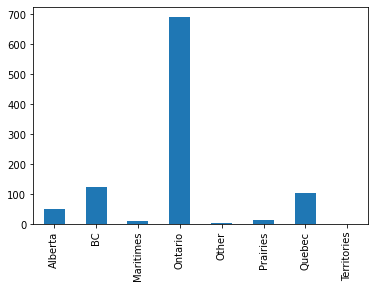

In [262]:
# Region
customers['REGION'].value_counts().sort_index()
customers.REGION.value_counts().sort_index().plot(kind='bar')

In [6]:
print("There are" , customers.CUSTOMER_KEY.nunique() ,"unique accounts in the dataset")

There are 997 unique accounts in the dataset


In [77]:
def data_cut(da,col,list1):
    lab=[]
    for i in range(len(list1)-1):
        if i == 0:
            new = [col , ' < ' , str(list1[i+1])]
            app = ''.join(new)
            lab.append(app)
        elif i == len(list1)-2:
            new = [str(list1[i]) , ' and above']
            app = ''.join(new)
            lab.append(app)
        else:
            new = [str(list1[i]) , ' - ', str(list1[i+1])]
            app = ''.join(new)
            lab.append(app)

    category = pd.cut(da[col], list1, 
                           labels=lab)
    return category

Text(0.5, 1.0, 'Age of the Customers')

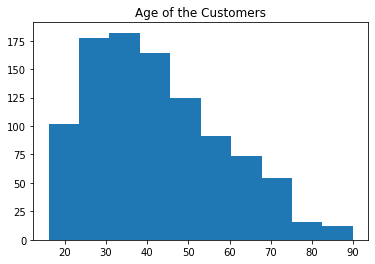

In [78]:
plt.hist(customers.AGE)
plt.title('Age of the Customers')

By the histogram, it is seen that the majority of the people in our data are around 30-40 years old. 

In [79]:
# update['balance_category'] = balance_category
# update

<AxesSubplot:>

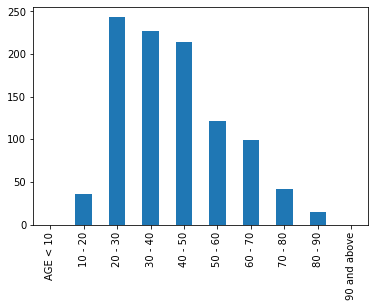

In [80]:
num = customers.CUSTOMER_KEY.count()

AGE_GROUP = np.arange(0,110,10).tolist()

age_category = data_cut(customers,'AGE',AGE_GROUP)

age_table = age_category.value_counts().sort_index()
age_table.plot(kind='bar')


<AxesSubplot:>

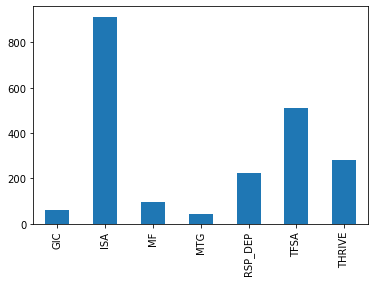

In [11]:
com.PROD_TYPE.value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

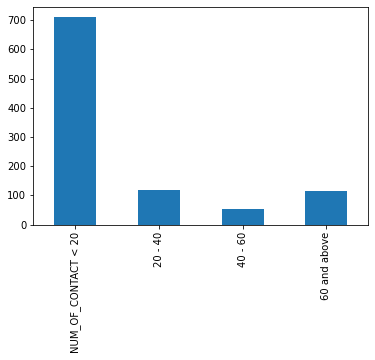

In [12]:
CONTACT_GROUP = [customers.NUM_OF_CONTACT.min()-1, customers.NUM_OF_CONTACT.min()+20, customers.NUM_OF_CONTACT.min()+40, 
                 customers.NUM_OF_CONTACT.min()+60, customers.NUM_OF_CONTACT.max()+1 ]

CONTACT_category = data_cut(customers,'NUM_OF_CONTACT',CONTACT_GROUP)

CONTACT_table = CONTACT_category.value_counts().sort_index()
CONTACT_table.plot(kind='bar')



In [13]:
# cat_features = com[[ 'REGION', 'age_category']]
# fig , ax = plt.subplots(2,1,figsize = (10,10))     # set up 2 x 2 frame count plot with figsize 10 x 10
# for i , subplots in zip (cat_features, ax.flatten()):  
#   sns.countplot(cat_features[i],hue = com[ 'age_category'],ax = subplots)
# plt.show()



(array([1.983e+03, 7.300e+01, 2.600e+01, 2.300e+01, 5.000e+00, 9.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([-2.76640000e+02,  5.50002690e+04,  1.10277178e+05,  1.65554087e+05,
         2.20830996e+05,  2.76107905e+05,  3.31384814e+05,  3.86661723e+05,
         4.41938632e+05,  4.97215541e+05,  5.52492450e+05]),
 <BarContainer object of 10 artists>)

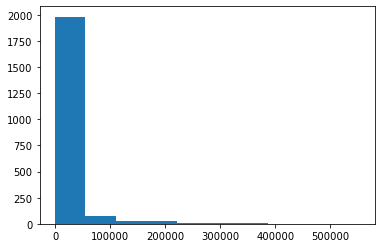

In [14]:
plt.hist(com.BALANCE)

In [81]:
# BALANCE_GROUP = [com.BALANCE.min()-1, com.BALANCE.min()+3000, com.BALANCE.min()+6000, com.BALANCE.min()+9000, com.BALANCE.max()+1 ]

# balance_category = data_cut(com,'BALANCE',BALANCE_GROUP)
# balance_table = balance_category.value_counts().sort_index()
# balance_table.plot(kind='bar')


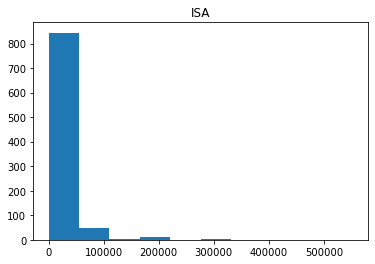

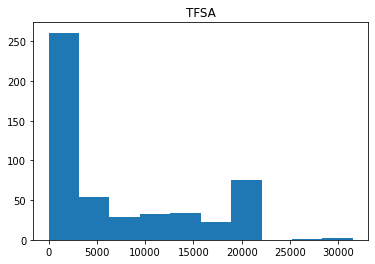

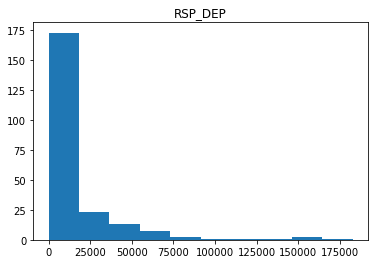

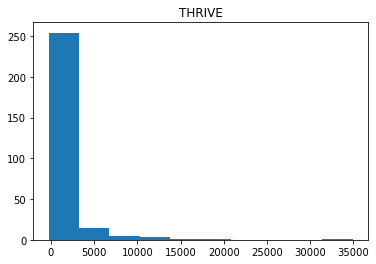

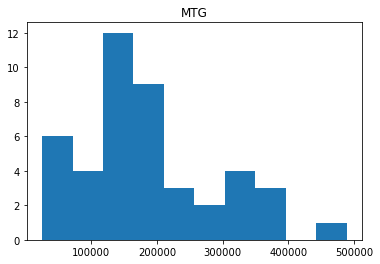

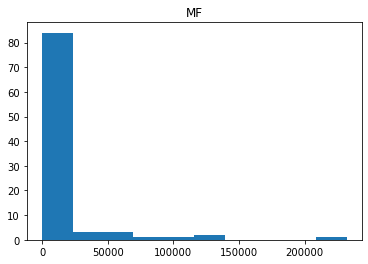

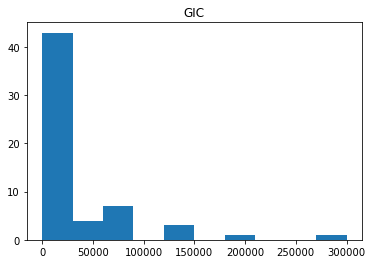

In [16]:
for i in range(com.PROD_TYPE.nunique()):
    plt.hist(com[com.PROD_TYPE == com.PROD_TYPE.unique()[i]].BALANCE)
    plt.title(com.PROD_TYPE.unique()[i])
    plt.show()



In [17]:
# cat_features = com[['REGION', 'balance_category']]
# fig , ax = plt.subplots(2,1,figsize = (10,10))     # set up 2 x 2 frame count plot with figsize 10 x 10
# for i , subplots in zip (cat_features, ax.flatten()):  
#   sns.countplot(cat_features[i],hue = com['balance_category'],ax = subplots)
# plt.show()


# Insight About potential cross-sell target

In [18]:
# com['thrive_1_others_0'] = com.PROD_TYPE == 'THRIVE'
# com.thrive_1_others_0.replace({False: 0, True: 1}, inplace=True)
# com.head()

1. customers that do not have Thrive acc

In [91]:
THRIVE_customer_key = com[com['PROD_TYPE'] == 'THRIVE'].CUSTOMER_KEY.unique()
len(THRIVE_customer_key)
print(str(len(THRIVE_customer_key)) + ' customers have Thrive account')

280 customers have Thrive account


In [106]:
thrive_customer = customers[customers.CUSTOMER_KEY.isin(THRIVE_customer_key)]

In [93]:
target = customers[~customers.CUSTOMER_KEY.isin(THRIVE_customer_key)]
target.CUSTOMER_KEY.count()

717

([<matplotlib.patches.Wedge at 0x7fe5c0ecaa00>,
 [Text(0.6989205740963729, 0.8494174657403725, 'Thrive'),
  Text(-0.6989206536245726, -0.8494174003027019, 'non-Thrive')])

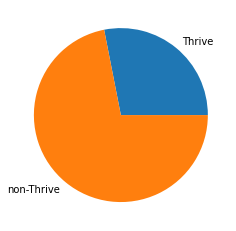

In [94]:
data = [len(THRIVE_customer_key),target.CUSTOMER_KEY.count()]
lab = ['Thrive','non-Thrive']
plt.pie(data, labels = lab)

Text(0.5, 1.0, 'All Customer')

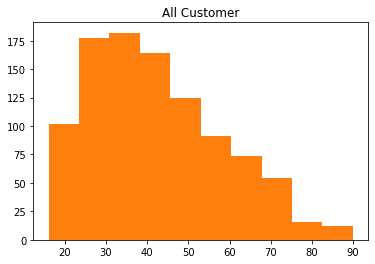

In [112]:
# plt.hist(target.AGE)
# plt.title('No Thrive account Customer')

plt.hist(thrive_customer.AGE)
plt.title('Thrive Customer')

plt.hist(customers.AGE)
plt.title('All Customer')


Text(0.5, 1.0, 'Thrive Customer')

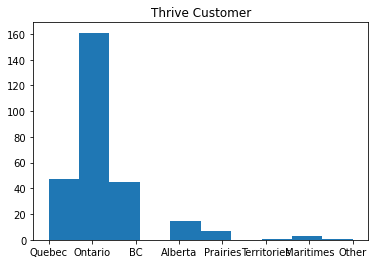

In [113]:
plt.hist(target.REGION)
plt.title('No Thrive account Customer')

plt.hist(thrive_customer.REGION)
plt.title('Thrive Customer')


plt.hist(customers.REGION)
plt.title('All Customer')


In [22]:
# plt.hist(com[com.thrive_1_others_0 == 1].AGE)
# plt.hist(com[com.thrive_1_others_0 == 0].AGE)

In [23]:
# plt.hist(com[com.thrive_1_others_0 == 1].REGION)
# plt.hist(com[com.thrive_1_others_0 == 0].REGION)

In [24]:
# BALANCE_GROUP = [Customer_no_thrive.BALANCE.min()-1, Customer_no_thrive.BALANCE.min()+3000
#                  , Customer_no_thrive.BALANCE.min()+6000, Customer_no_thrive.BALANCE.min()+9000, Customer_no_thrive.BALANCE.max()+1 ]

# balance_category = data_cut(Customer_no_thrive,'BALANCE',BALANCE_GROUP)
# balance_table = balance_category.value_counts().sort_index()
# balance_table.plot(kind='bar')

# plt.hist(com[com.thrive_1_others_0 == 1].BALANCE)
# plt.hist(com[com.thrive_1_others_0 == 0].BALANCE)



# 2.2. What is the Deposit Balance Distribution? Potential target group vs. Customer base.

(array([1.983e+03, 7.300e+01, 2.600e+01, 2.300e+01, 5.000e+00, 9.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([-2.76640000e+02,  5.50002690e+04,  1.10277178e+05,  1.65554087e+05,
         2.20830996e+05,  2.76107905e+05,  3.31384814e+05,  3.86661723e+05,
         4.41938632e+05,  4.97215541e+05,  5.52492450e+05]),
 <BarContainer object of 10 artists>)

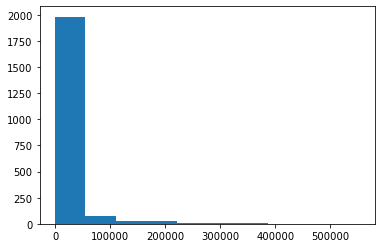

In [25]:
plt.hist(com.BALANCE)

Text(0.5, 1.0, 'All customers with Deposit profile')

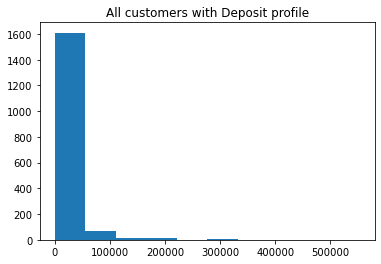

In [114]:
list_deposit = ['ISA', 'TFSA', 'RSP_DEP', 'GIC']

plt.hist(com[com.PROD_TYPE.isin(list_deposit)].BALANCE)
plt.title('All customers with Deposit profile')

Text(0.5, 1.0, 'Target customers with Deposit profile')

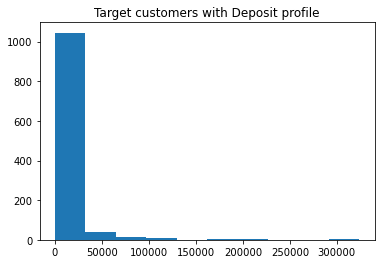

In [121]:
target_2 = com[com.CUSTOMER_KEY.isin(target.CUSTOMER_KEY)]

plt.hist(target_2[target_2.PROD_TYPE.isin(list_deposit)].BALANCE)
plt.title('Target customers with Deposit profile')

In [27]:
#2.3. Are these high or low Deposit balance customers?

In [405]:
list_deposit = ['ISA', 'TFSA', 'RSP_DEP', 'GIC']
tt = com[com.PROD_TYPE.isin(list_deposit)]

In [407]:
testing = tt.groupby(['CUSTOMER_KEY'])['BALANCE'].sum()
testing = testing.to_frame()

dd = [testing.BALANCE.min()-1, round(testing.BALANCE.mean()), testing.BALANCE.max()+1]

assa = data_cut(testing,'BALANCE',dd)
assa.value_counts()


testing['high'] = assa
testing['high'] = testing['high'].map({testing.high.unique()[0]: 1, testing.high.unique()[1]: 0})
testing

testing.high.value_counts().sort_index().plot(kind='bar')
plt.title('All customers')

BALANCE < 21546    770
21546 and above    227
Name: BALANCE, dtype: int64

Text(0.5, 1.0, 'Target customers')

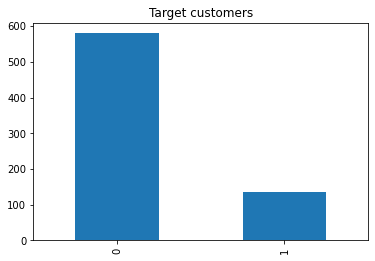

In [417]:
testing2 = target_2.groupby(['CUSTOMER_KEY'])['BALANCE'].sum()
testing2 = testing2.to_frame()

dd = [testing.BALANCE.min()-1, round(testing.BALANCE.mean()), testing.BALANCE.max()+1]

assa2 = data_cut(testing2,'BALANCE',dd)
assa2.value_counts()


testing2['high'] = assa2
testing2['high'] = testing2['high'].map({testing2.high.unique()[0]: 1, testing2.high.unique()[1]: 0})
testing2

testing2.high.value_counts().sort_index().plot(kind='bar')
plt.title('Target customers')

In [32]:
#2.4. How long have these clients been with the bank (year)?

In [33]:
from datetime import datetime
import numpy as np

maxi = max(customers.CLIENT_DATE.dt.year)
customers.CLIENT_DATE.replace({np.nan:maxi}, inplace = True)
diff = max(customers.CLIENT_DATE.dt.year) - customers.CLIENT_DATE.dt.year
customers['year_gap'] = diff

Text(0.5, 1.0, 'All customers')

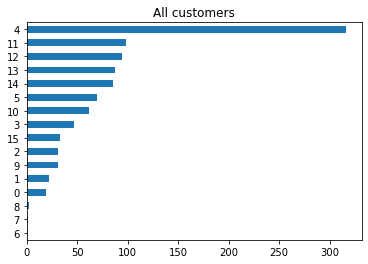

In [143]:
customers.year_gap.value_counts().sort_values().plot.barh()
plt.title('All customers')

Text(0.5, 1.0, 'Target customers')

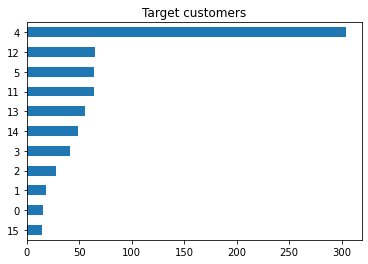

In [153]:
target_3 = customers[customers.CUSTOMER_KEY.isin(target_2.CUSTOMER_KEY)]
target_3.year_gap.value_counts().sort_values().plot.barh()
plt.title('Target customers')

In [35]:
#2.5. On average, how many products do they have? And what other products do they hold?

In [36]:
counts = com.PROD_TYPE.value_counts()
percs = com.PROD_TYPE.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
ISA,913,42.964706
TFSA,510,24.000000
THRIVE,280,13.176471
RSP_DEP,224,10.541176
MF,95,4.470588
GIC,59,2.776471
MTG,44,2.070588


In [37]:
pivot = com.pivot_table(index = ['CUSTOMER_KEY'], aggfunc ='size').reset_index()

In [38]:
pivot.loc[:,0].mean()

2.131394182547643

In [39]:
#2.6. Any other insights that would add value to the initiative?

In [40]:
table26 = com.groupby(['PROD_TYPE','REGION']).count()
table26.iloc[:,0] 

PROD_TYPE  REGION     
GIC        Alberta          1
           BC              11
           Maritimes        1
           Ontario         40
           Other            1
           Quebec           5
ISA        Alberta         44
           BC             117
           Maritimes        9
           Ontario        623
           Other            3
           Prairies        13
           Quebec         102
           Territories      2
MF         Alberta          7
           BC              12
           Maritimes        3
           Ontario         62
           Prairies         1
           Quebec          10
MTG        Alberta          4
           BC               4
           Ontario         33
           Quebec           3
RSP_DEP    Alberta         15
           BC              23
           Maritimes        1
           Ontario        160
           Prairies         2
           Quebec          22
           Territories      1
TFSA       Alberta         31
           BC    

In [165]:
contact_GROUP = [com.NUM_OF_CONTACT.min()-1, com.NUM_OF_CONTACT.min()+50, com.NUM_OF_CONTACT.min()+100, com.NUM_OF_CONTACT.min()+150, com.NUM_OF_CONTACT.max()+200 ]

contact_category = data_cut(com,'NUM_OF_CONTACT',contact_GROUP)

# com['contact_category'] = contact_category

table26 = com.groupby(['contact_category','REGION']).count()
table26.iloc[:,0] 



contact_category     REGION     
NUM_OF_CONTACT < 50  Alberta          96
                     BC              209
                     Maritimes        13
                     Ontario        1170
                     Other             5
                     Prairies         27
                     Quebec          181
                     Territories       5
50 - 100             Alberta          16
                     BC               42
                     Maritimes         4
                     Ontario         138
                     Other             0
                     Prairies          2
                     Quebec           37
                     Territories       0
100 - 150            Alberta           0
                     BC               17
                     Maritimes         0
                     Ontario          43
                     Other             0
                     Prairies          2
                     Quebec           17
                     Ter

In [42]:
#III. Campaign Development and Management

In [286]:

part3 = com.drop_duplicates(subset='CUSTOMER_KEY', keep='last')
part3_c_mail = part3[['CUSTOMER_KEY','EmailPermission','MailPermission']]


In [287]:
part3_c_mail = part3_c_mail[part3_c_mail.CUSTOMER_KEY.isin(target.CUSTOMER_KEY)]


In [288]:
email_number = part3_c_mail[part3_c_mail.EmailPermission == 'Y'].count()[1]
email_cost = part3_c_mail[part3_c_mail.EmailPermission == 'Y'].count()[1]*0.05

In [289]:
print("There are" , email_number ,"customers who would accept email notification. "
      "The cost is ", email_cost, " dollars.")


There are 555 customers who would accept email notification. The cost is  27.75  dollars.


In [290]:
email_customer = part3_c_mail[part3_c_mail.EmailPermission == 'Y']
email_customer


,CUSTOMER_KEY,EmailPermission,MailPermission
1,1001,Y,N
2,1002,Y,N
3,1003,Y,N
4,1004,Y,N
6,1005,Y,N
...,...,...,...
2069,1979,Y,Y
2070,1980,Y,Y
2072,1981,Y,Y
2074,1982,Y,Y


In [291]:


part3_c_mail_not_in = part3_c_mail[~part3_c_mail['CUSTOMER_KEY'].isin(email_customer.CUSTOMER_KEY)]
mail_number = part3_c_mail_not_in[part3_c_mail_not_in.MailPermission == 'Y'].count()[1]
mail_cost = part3_c_mail_not_in[part3_c_mail_not_in.MailPermission == 'Y'].count()[1] *1.75


In [423]:
# mail_numberx = part3_c_mail[part3_c_mail.MailPermission == 'Y'].count()[1]
# mail_costx = part3_c_mail[part3_c_mail.MailPermission == 'Y'].count()[1]*1.75
# mail_costx

In [292]:
print("There are" , mail_number ,"customers who would accept mail notification. "
      "The cost is ", mail_cost, " dollars.")


There are 140 customers who would accept mail notification. The cost is  245.0  dollars.


In [293]:
total_cost = email_cost+mail_cost
total_budget = 1000

In [294]:
def check_total(cost,budget):
    if cost>budget:
        print(cost,'>',budget,'.Therefore, we dont have enough budget.')
    else:
        print(cost,'<',budget,'.Therefore, we have enough budget.')


In [295]:
check_total(total_cost,total_budget)

272.75 < 1000 .Therefore, we have enough budget.


In [296]:
# we first find the customers who are willing to accept email. 
# then we find the customers who are only mailing acceptance.

In [297]:
thrive_customer.CUSTOMER_KEY.count()
thrive_customer.CUSTOMER_KEY.nunique()


280

Text(0.5, 1.0, 'Age of Customer with Thrive Account')

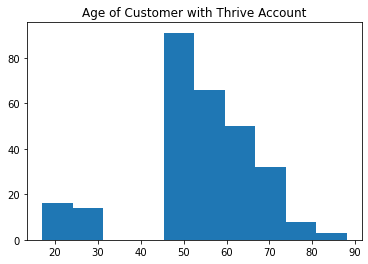

In [298]:
thrive_customer = com[com['PROD_TYPE'] == 'THRIVE']
plt.hist(thrive_customer.AGE)
plt.title('Age of Customer with Thrive Account')


Sending BY Target AGE 

In [299]:
target_age_mail = target[['CUSTOMER_KEY','AGE','EmailPermission','MailPermission']]

stage_one = target[target_age_mail.AGE <= 75]

stage_two =  stage_one[stage_one.AGE >=0]

final = stage_two[['CUSTOMER_KEY','EmailPermission','MailPermission']]


In [300]:
email_number_AGE = final[final.EmailPermission == 'Y'].count()[1]
email_cost_AGE = final[final.EmailPermission == 'Y'].count()[1]*0.05

In [301]:
print("There are" , email_number_AGE ,"customers who would accept email notification. "
      "The cost is ", email_cost_AGE, " dollars.")


There are 542 customers who would accept email notification. The cost is  27.1  dollars.


In [302]:
email_customer_AGE = final[final.EmailPermission == 'Y']
email_customer_AGE


final_not_in = final[~final['CUSTOMER_KEY'].isin(email_customer_AGE.CUSTOMER_KEY)]
mail_number_AGE = final_not_in[final_not_in.MailPermission == 'Y'].count()[1]
mail_cost_AGE = final_not_in[final_not_in.MailPermission == 'Y'].count()[1] *1.75


In [303]:
print("There are" , mail_number_AGE ,"customers who would accept mail notification. "
      "The cost is ", mail_cost_AGE, " dollars.")


There are 135 customers who would accept mail notification. The cost is  236.25  dollars.


In [304]:
target_AGE_MAIL_equal_Y = final[final.MailPermission == 'Y'].count()[1]*1.75

(array([530.,  78.,  57.,   0.,  36.,   2.,   0.,   6.,   7.,   1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

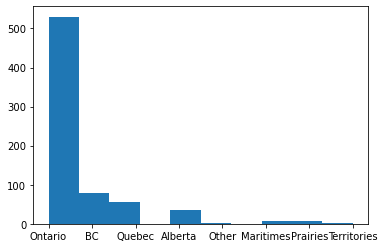

In [305]:
plt.hist(target.REGION)

In [306]:
OnBCQU = ['Ontario','BC','Quebec','Alberta']
target2 = target[target.REGION.isin(OnBCQU)]

final2 = target2[['CUSTOMER_KEY','EmailPermission','MailPermission']]

email_number_REGION = final2[final2.EmailPermission == 'Y'].count()[1]
email_cost_REGION = final2[final2.EmailPermission == 'Y'].count()[1]*0.05

In [307]:
print("There are" , email_number_REGION ,"customers who would accept mail notification. "
      "The cost is ", round(email_cost_REGION), " dollars.")


There are 544 customers who would accept mail notification. The cost is  27  dollars.


In [308]:
email_customer_REGION = final2[final2.EmailPermission == 'Y']



final_not_in2 = final2[~final2['CUSTOMER_KEY'].isin(email_customer_REGION.CUSTOMER_KEY)]
mail_number_REGION = final_not_in2[final_not_in2.MailPermission == 'Y'].count()[1]
mail_cost_REGION = final_not_in2[final_not_in2.MailPermission == 'Y'].count()[1] *1.75




In [309]:
print("There are" , mail_number_REGION ,"customers who would accept mail notification. "
      "The cost is ", round(mail_cost_REGION), " dollars.")


There are 137 customers who would accept mail notification. The cost is  240  dollars.


In [310]:
email_cost_REGION+mail_cost_REGION+email_cost_AGE+mail_cost_AGE

530.3

In [312]:
round(total_cost+email_cost_REGION+mail_cost_REGION+email_cost_AGE+mail_cost_AGE)

803

(array([649.,  42.,  10.,   9.,   3.,   0.,   1.,   2.,   0.,   1.]),
 array([  0. ,  32.8,  65.6,  98.4, 131.2, 164. , 196.8, 229.6, 262.4,
        295.2, 328. ]),
 <BarContainer object of 10 artists>)

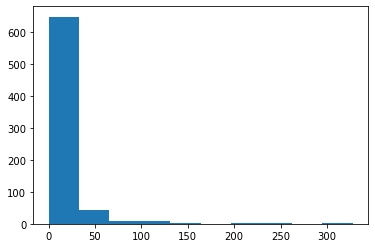

In [332]:
plt.hist(target.NUM_OF_CONTACT)

In [333]:
target3 = target[target.NUM_OF_CONTACT>=10]

final3 = target3[['CUSTOMER_KEY','EmailPermission','MailPermission']]

email_number_CONTACT = final3[final3.EmailPermission == 'Y'].count()[1]
email_cost_CONTACT = final3[final3.EmailPermission == 'Y'].count()[1]*0.05

In [334]:
print("There are" , email_number_CONTACT ,"customers who would accept mail notification. "
      "The cost is ", round(email_cost_CONTACT), " dollars.")


There are 143 customers who would accept mail notification. The cost is  7  dollars.


In [327]:
email_customer_CONTACT = final3[final3.EmailPermission == 'Y']



final_not_in3 = final3[~final3['CUSTOMER_KEY'].isin(email_customer_CONTACT.CUSTOMER_KEY)]
mail_number_CONTACT = final_not_in3[final_not_in3.MailPermission == 'Y'].count()[1]
mail_cost_CONTACT = final_not_in3[final_not_in3.MailPermission == 'Y'].count()[1] *1.75




In [328]:
print("There are" , mail_number_CONTACT ,"customers who would accept mail notification. "
      "The cost is ", round(mail_cost_CONTACT), " dollars.")


There are 39 customers who would accept mail notification. The cost is  68  dollars.


In [329]:
round(total_cost+email_cost_REGION+mail_cost_REGION+email_cost_AGE+mail_cost_AGE+email_cost_CONTACT+mail_cost_CONTACT)

878

In [419]:
round(total_cost+email_cost_REGION+mail_cost_REGION+email_cost_AGE+mail_cost_AGE)

803